#### PROBLEM STATEMENT - 
Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.

#### Import packages

In [227]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

#### Reading the data

In [228]:
coca = pd.read_excel('E:\\deeksha\\python\\data\\CocaCola_Sales_Rawdata.xlsx')

#### Performing EDA on data

In [109]:
coca

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [229]:
coca.shape, coca.size

((42, 2), 84)

#### Checking for nulls and na's

In [230]:
coca.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [111]:
coca.isna().sum()

Quarter    0
Sales      0
dtype: int64

In [231]:
coca.duplicated().sum()

0

In [232]:
coca.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


Here we can see Minimum sale is 1547.818996,
Maximum sale is 5253 ,
Average sale is 2994.353308

In [233]:
coca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


#### Correlation among features

In [234]:
coca.corr()

,Sales
Sales,1.0


#### Plotting overall sales 

<AxesSubplot:>

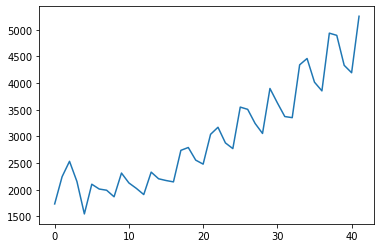

In [235]:
coca.Sales.plot()

#### Plotting Boxplot

<AxesSubplot:xlabel='Quarter', ylabel='Sales'>

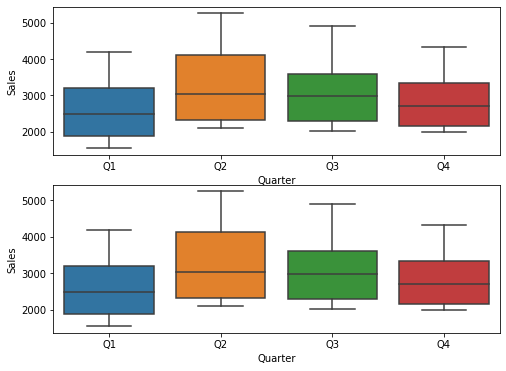

In [211]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="Quarter",y="Sales",data=coca)
plt.subplot(212)
sns.boxplot(x="Quarter",y="Sales",data=coca)

In [242]:
coca.head()

,Quarter,Sales
0,Q1,1734.827000
1,Q2,2244.960999
2,Q3,2533.804993
3,Q4,2154.962997
4,Q1,1547.818996


In [243]:
coca['Quarter'].unique()

array(['Q1', 'Q2', 'Q3', 'Q4'], dtype=object)

#### Creating new column with reference to quarter 

In [244]:
coca['Quarter'] = (np.where(coca['Quarter'].str.contains('_'),
                  coca['Quarter'].str.split('_').str[0],
                  coca['Quarter']))

In [240]:
coca

,Quarter,Sales
0,Q1,1734.827000
1,Q2,2244.960999
2,Q3,2533.804993
3,Q4,2154.962997
4,Q1,1547.818996
5,Q2,2104.411995
6,Q3,2014.362999
7,Q4,1991.746998
8,Q1,1869.049999
9,Q2,2313.631996


#### Using 1 hot encoding to convert rows to columns

In [262]:
coca_N = pd.get_dummies(coca, columns= ['Quarter'])

In [266]:
coca_N = coca_N.rename(columns= {"Quarter_Q1": "Q1", "Quarter_Q2": "Q2", "Quarter_Q3": "Q3", "Quarter_Q4" : "Q4"})

In [267]:
coca_N

,Sales,Q1,Q2,Q3,Q4
0,1734.827000,1,0,0,0
1,2244.960999,0,1,0,0
2,2533.804993,0,0,1,0
3,2154.962997,0,0,0,1
4,1547.818996,1,0,0,0
5,2104.411995,0,1,0,0
6,2014.362999,0,0,1,0
7,1991.746998,0,0,0,1
8,1869.049999,1,0,0,0
9,2313.631996,0,1,0,0


In [268]:
len(coca_N)

42

#### Creating new column t (timeseries)

In [269]:
list(range(1,len(coca_N)+1))

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42]

In [270]:
coca_N['t'] = list(range(1,len(coca_N)+1))

In [271]:
coca_N

,Sales,Q1,Q2,Q3,Q4,t
0,1734.827000,1,0,0,0,1
1,2244.960999,0,1,0,0,2
2,2533.804993,0,0,1,0,3
3,2154.962997,0,0,0,1,4
4,1547.818996,1,0,0,0,5
5,2104.411995,0,1,0,0,6
6,2014.362999,0,0,1,0,7
7,1991.746998,0,0,0,1,8
8,1869.049999,1,0,0,0,9
9,2313.631996,0,1,0,0,10


#### Creating new column t-square

In [272]:
coca_N['t_square']= coca_N['t']**2

In [273]:
coca_N

,Sales,Q1,Q2,Q3,Q4,t,t_square
0,1734.827000,1,0,0,0,1,1
1,2244.960999,0,1,0,0,2,4
2,2533.804993,0,0,1,0,3,9
3,2154.962997,0,0,0,1,4,16
4,1547.818996,1,0,0,0,5,25
5,2104.411995,0,1,0,0,6,36
6,2014.362999,0,0,1,0,7,49
7,1991.746998,0,0,0,1,8,64
8,1869.049999,1,0,0,0,9,81
9,2313.631996,0,1,0,0,10,100


In [274]:
coca_N.head()

,Sales,Q1,Q2,Q3,Q4,t,t_square
0,1734.827000,1,0,0,0,1,1
1,2244.960999,0,1,0,0,2,4
2,2533.804993,0,0,1,0,3,9
3,2154.962997,0,0,0,1,4,16
4,1547.818996,1,0,0,0,5,25


In [275]:
coca_N['log_Sales'] = np.log(coca_N['Sales'])

# Display the DataFrame
print(df)


     t
0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
10  10
11  11
12  12
13  13
14  14
15  15
16  16
17  17
18  18
19  19
20  20
21  21
22  22
23  23
24  24
25  25
26  26
27  27
28  28
29  29
30  30
31  31
32  32
33  33
34  34
35  35
36  36
37  37
38  38
39  39
40  40


In [276]:
coca_N.head()

,Sales,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,1734.827000,1,0,0,0,1,1,7.458663
1,2244.960999,0,1,0,0,2,4,7.716443
2,2533.804993,0,0,1,0,3,9,7.837477
3,2154.962997,0,0,0,1,4,16,7.675529
4,1547.818996,1,0,0,0,5,25,7.344602


In [299]:
coca_N['sumall'] = coca_N['Q1'] + coca_N['Q2'] + coca_N['Q3'] + coca_N['Q4']


In [300]:
coca_N

,Sales,Q1,Q2,Q3,Q4,t,t_square,log_Sales,Q1+Q2+Q3+Q4,sumall
0,1734.827000,1,0,0,0,1,1,7.458663,1,1
1,2244.960999,0,1,0,0,2,4,7.716443,1,1
2,2533.804993,0,0,1,0,3,9,7.837477,1,1
3,2154.962997,0,0,0,1,4,16,7.675529,1,1
4,1547.818996,1,0,0,0,5,25,7.344602,1,1
5,2104.411995,0,1,0,0,6,36,7.651791,1,1
6,2014.362999,0,0,1,0,7,49,7.608058,1,1
7,1991.746998,0,0,0,1,8,64,7.596767,1,1
8,1869.049999,1,0,0,0,9,81,7.533186,1,1
9,2313.631996,0,1,0,0,10,100,7.746574,1,1


<AxesSubplot:xlabel='Quarter', ylabel='Sales'>

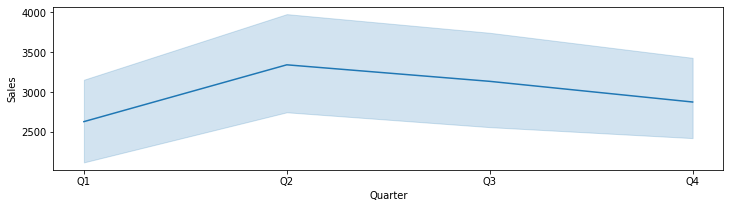

In [301]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Quarter",y="Sales",data=coca)

In [302]:
Train = coca_N.head(30)
Test = coca_N.tail(11)

In [303]:
Train.head()

,Sales,Q1,Q2,Q3,Q4,t,t_square,log_Sales,Q1+Q2+Q3+Q4,sumall
0,1734.827000,1,0,0,0,1,1,7.458663,1,1
1,2244.960999,0,1,0,0,2,4,7.716443,1,1
2,2533.804993,0,0,1,0,3,9,7.837477,1,1
3,2154.962997,0,0,0,1,4,16,7.675529,1,1
4,1547.818996,1,0,0,0,5,25,7.344602,1,1


In [304]:
Test

,Sales,Q1,Q2,Q3,Q4,t,t_square,log_Sales,Q1+Q2+Q3+Q4,sumall
31,3373.0,0,0,0,1,32,1024,8.123558,1,1
32,3352.0,1,0,0,0,33,1089,8.117312,1,1
33,4342.0,0,1,0,0,34,1156,8.376090,1,1
34,4461.0,0,0,1,0,35,1225,8.403128,1,1
35,4017.0,0,0,0,1,36,1296,8.298291,1,1
36,3854.0,1,0,0,0,37,1369,8.256867,1,1
37,4936.0,0,1,0,0,38,1444,8.504311,1,1
38,4895.0,0,0,1,0,39,1521,8.495970,1,1
39,4333.0,0,0,0,1,40,1600,8.374015,1,1
40,4194.0,1,0,0,0,41,1681,8.341410,1,1


#### Using Models 

In [305]:
#Linear Model
import statsmodels.formula.api as smf


In [306]:
linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

741.5970186397843

In [307]:
#Exponential

Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp



573.2803759512407

In [308]:
#Quadratic

Quad = smf.ols('Sales~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

672.5516785818108

In [310]:
#Additive seasonality

add_sea = smf.ols('Sales~sumall',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['sumall']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea



1863.010571383532

In [313]:
#Additive Seasonality Quadratic

add_sea_Quad = smf.ols('Sales~t+t_square+sumall',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['sumall','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad


672.5516785818376

In [314]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_Sales~sumall',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1922.3676663705376

In [315]:
#Multiplicative Additive Seasonality

Mul_Add_sea = smf.ols('log_Sales~t+sumall',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

573.2803759512507

#### Compare the results

In [316]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
1,rmse_Exp,573.280376
6,rmse_Mult_add_sea,573.280376
2,rmse_Quad,672.551679
4,rmse_add_sea_quad,672.551679
0,rmse_linear,741.597019
3,rmse_add_sea,1863.010571
5,rmse_Mult_sea,1922.367666


#### The model with the lowest values for the chosen metrics is considered the best that is rmse_Exp and rmse_Mult_add_sea

#### AirLInes Data

In [321]:
air = pd.read_excel('E:\\deeksha\\python\\data\\Airlines+Data.xlsx')

#### EDA on data

In [322]:
air.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [330]:
## checking null's , na's and duplicates values

In [323]:
air.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [326]:
air.isna().sum()

Month         0
Passengers    0
dtype: int64

In [329]:
air.duplicated().sum()

0

In [331]:
air.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [332]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [333]:
air.corr()

,Passengers
Passengers,1.0


#### Plotting Passenger values

<AxesSubplot:>

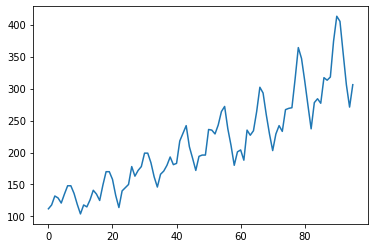

In [334]:
air.Passengers.plot()

<AxesSubplot:xlabel='Month', ylabel='Passengers'>

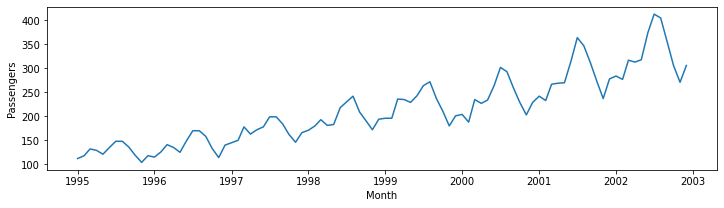

In [343]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Month",y="Passengers",data=air)

In [345]:
air

,Month,Passengers,Date
0,1995-01-01,112,1995-01-01
1,1995-02-01,118,1995-02-01
2,1995-03-01,132,1995-03-01
3,1995-04-01,129,1995-04-01
4,1995-05-01,121,1995-05-01
...,...,...,...
91,2002-08-01,405,2002-08-01
92,2002-09-01,355,2002-09-01
93,2002-10-01,306,2002-10-01
94,2002-11-01,271,2002-11-01


#### Extracting Month , Year and Day from Month Column

In [349]:
air["month"] = air.Date.dt.strftime("%b") # month extraction
air["year"] = air.Date.dt.strftime("%Y") # year extraction
air["Day"] = air.Date.dt.strftime("%d") # Day extraction

In [376]:
air

,Month,Passengers,Date,month,year,Day
0,1995-01-01,112,1995-01-01,Jan,1995,01
1,1995-02-01,118,1995-02-01,Feb,1995,01
2,1995-03-01,132,1995-03-01,Mar,1995,01
3,1995-04-01,129,1995-04-01,Apr,1995,01
4,1995-05-01,121,1995-05-01,May,1995,01
...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002,01
92,2002-09-01,355,2002-09-01,Sep,2002,01
93,2002-10-01,306,2002-10-01,Oct,2002,01
94,2002-11-01,271,2002-11-01,Nov,2002,01


#### Transforming rows to columns

In [353]:
air_N = pd.get_dummies(air , columns= ['month'])

In [354]:
air_N.head(2)

,Month,Passengers,Date,year,Day,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,1995-01-01,112,1995-01-01,1995,01,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995-02-01,1995,01,0,0,0,1,0,0,0,0,0,0,0,0


#### Renaming Columns

In [378]:
air_N= air_N.rename(columns= {'month_Apr': 'Apr', 'month_Aug': 'Aug', 'month_Dec': 'Dec', 'month_Feb': 'Feb', 'month_Jan':'Jan', 'month_Jul' :'Jul','month_Jun':'Jun',
                       'month_Mar': 'Mar', 'month_May': 'May' ,'month_Nov':'Nov',  'month_Oct': 'Oct', 'month_Sep': 'Sep'})

#### Creating New Columns of time(t), log_t, square_t

In [357]:
list(range(1,len(air_N)+1))

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96]

#### t

In [379]:
air_N['t']= list(range(1,len(air_N)+1))

In [380]:
air_N.head(1)

,Month,Passengers,Date,year,Day,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
0,1995-01-01,112,1995-01-01,1995,01,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499


#### t_square

In [381]:
air_N['t_square']= air_N['t']**2

#### log_Passengers

In [382]:
air_N['log_Passengers'] = np.log(air_N['Passengers'])


In [383]:
air_N.head()

,Month,Passengers,Date,year,Day,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
0,1995-01-01,112,1995-01-01,1995,01,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,1995-02-01,1995,01,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,1995-03-01,1995,01,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,1995-04-01,1995,01,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,1995-05-01,1995,01,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791


#### Splitting the data into Train and Test

In [384]:
Train = air_N.head(70)
Test = air_N.tail(25)

#### Building Models 

In [372]:
#Linear Model
import statsmodels.formula.api as smf

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

48.130948240578945

In [373]:
#Exponential

Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

42.557258171213554

In [374]:
#Quadratic

Quad = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

43.23175368553895

In [385]:
#Additive seasonality

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

126.88830083537603

In [386]:
#Additive Seasonality Quadratic

add_sea_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

30.828824135987794

In [387]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

131.59255485658736

In [388]:
#Multiplicative Additive Seasonality

Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

11.861379084576075

In [389]:
#Compare the results

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,11.861379
4,rmse_add_sea_quad,30.828824
1,rmse_Exp,42.557258
2,rmse_Quad,43.231754
0,rmse_linear,48.130948
3,rmse_add_sea,126.888301
5,rmse_Mult_sea,131.592555


#### The model with the lowest values for the chosen metrics is considered the best that is rmse_Mult_add_sea

In [393]:
#Build the model on entire data set
Model = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))

In [396]:
pred_new  = pd.Series(Model.predict(air_N))
pred_new

0     4.689034
1     4.713543
2     4.859266
3     4.816336
4     4.804379
        ...   
91    5.980028
92    5.872725
93    5.745644
94    5.622215
95    5.760381
Length: 96, dtype: float64

In [415]:
air_N["forecasted_Passengers"] = pd.Series(pred_new)

In [430]:
air_n2

0     4.689034
1     4.713543
2     4.859266
3     4.816336
4     4.804379
        ...   
91    5.980028
92    5.872725
93    5.745644
94    5.622215
95    5.760381
Length: 96, dtype: float64